In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('../data/diabetes.csv')  # Adjust if you saved it somewhere else

# Display the first few rows
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


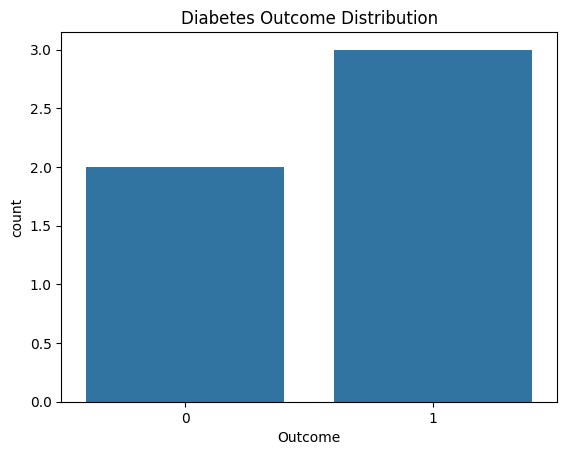

In [2]:
# Count plot of diabetes outcomes (0 = No, 1 = Yes)
sns.countplot(x='Outcome', data=df)
plt.title('Diabetes Outcome Distribution')
plt.show()


In [3]:
# Basic summary
print(df.info())

# Statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               5 non-null      int64  
 1   Glucose                   5 non-null      int64  
 2   BloodPressure             5 non-null      int64  
 3   SkinThickness             5 non-null      int64  
 4   Insulin                   5 non-null      int64  
 5   BMI                       5 non-null      float64
 6   DiabetesPedigreeFunction  5 non-null      float64
 7   Age                       5 non-null      int64  
 8   Outcome                   5 non-null      int64  
dtypes: float64(2), int64(7)
memory usage: 488.0 bytes
None
       Pregnancies     Glucose  BloodPressure  SkinThickness    Insulin  \
count     5.000000    5.000000       5.000000       5.000000    5.00000   
mean      3.200000  128.400000      61.600000      24.400000   52.40000   
std       

In [4]:
# Replace 0s with NaN in columns where 0 doesn't make sense
cols_to_clean = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_to_clean] = df[cols_to_clean].replace(0, pd.NA)

# Then drop rows with missing data (for now)
df_clean = df.dropna()


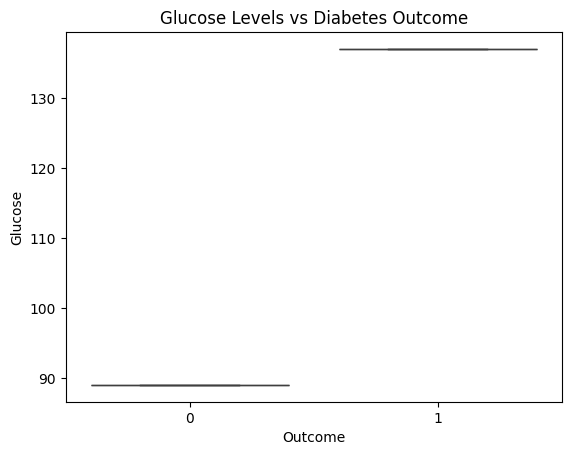

In [5]:
sns.boxplot(x='Outcome', y='Glucose', data=df_clean)
plt.title('Glucose Levels vs Diabetes Outcome')
plt.show()


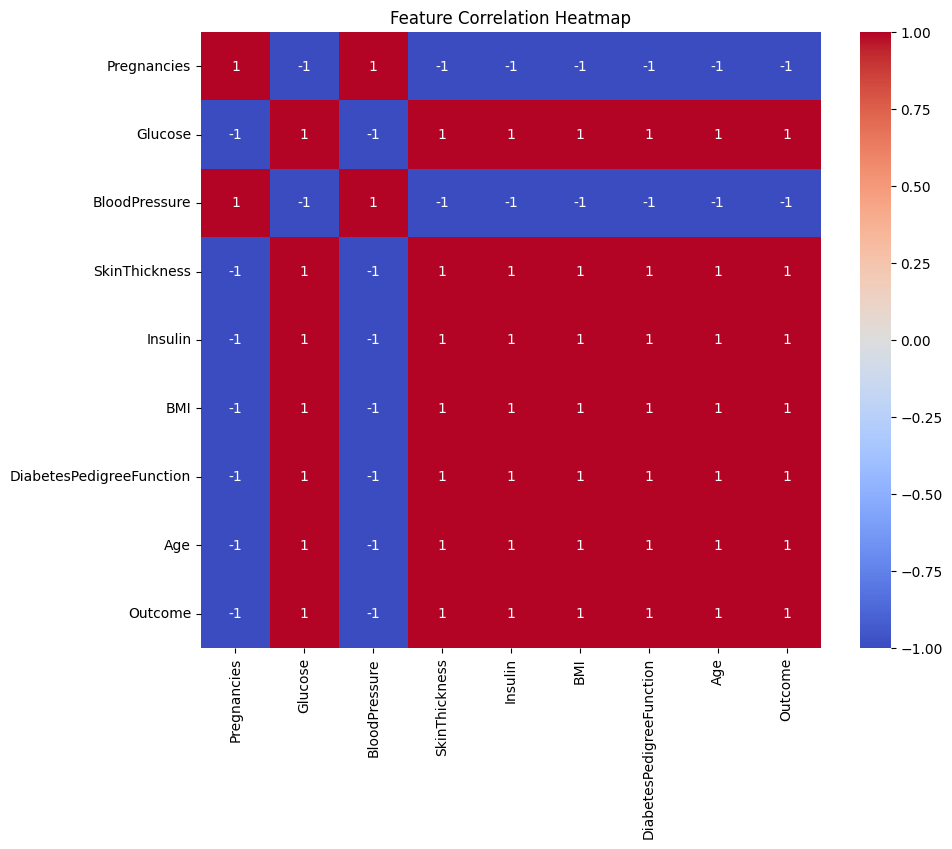

In [6]:
plt.figure(figsize=(10,8))
sns.heatmap(df_clean.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


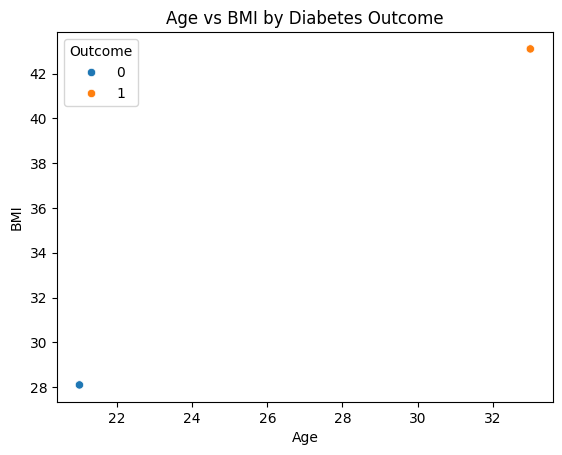

In [7]:
sns.scatterplot(x='Age', y='BMI', hue='Outcome', data=df_clean)
plt.title('Age vs BMI by Diabetes Outcome')
plt.show()
